# Visualizing decomposition results of ENCODE DNase-Seq biosamples
Based on 733 sample x 3.5+ million DHS Presence/Absence matrix

# 1. Import libraries & load decomposed matrices

In [1]:
from platform import python_version
print(python_version())

3.6.4


In [2]:
import sys
import numpy as np
import pandas as pd
import gzip
import matplotlib.pyplot as plt

In [3]:
sys.path.append('..')
import OONMFhelpers
import OONMF

### Load in previously decomposed matrices and verify shape
These data can also be obtained from here: https://doi.org/10.5281/zenodo.3752359

In [4]:
decomp = OONMF.NMFobject(16)
decomp.matrix_input_name('../data/2018-06-08NC16_NNDSVD_Basis.npy', '../data/2018-06-08NC16_NNDSVD_Mixture.npy')
decomp.read_matrix_input(compressed=True)
decomp.Basis.shape

(733, 16)

### Obtain names of the ENCODE biosamples

In [5]:
sampnamePD = pd.read_table('../data/sampnams_733.txt', header=None, names=['LN', 'DS', 'type'])
sampnamePD['full_name'] = sampnamePD.LN + '-' + sampnamePD.DS + '-' + sampnamePD.type
fullnames = sampnamePD.full_name.values
len(fullnames)

733

# 2. Visualization of 16 NMF component  x 733 biosample matrix

### Sort the samples by majority NMF component

In [6]:
from OONMFhelpers import get_barsortorder
bar_graph_sort_order = get_barsortorder(decomp.Basis)

In [7]:
Comp_colors = ['#FFE500', '#FE8102', '#FF0000', '#07AF00', '#4C7D14', '#414613', '#05C1D9', '#0467FD', '#009588', '#BB2DD4', '#7A00FF', '#4A6876', '#08245B', '#B9461D', '#692108', '#C3C3C3']
neworder = np.array([16,10,7,11,2,12,1,8,4,15,14,5,9,6,3,13]).astype(int) - 1
Comp_colors = np.array(Comp_colors)[neworder]

### First, show a simple heatmap.

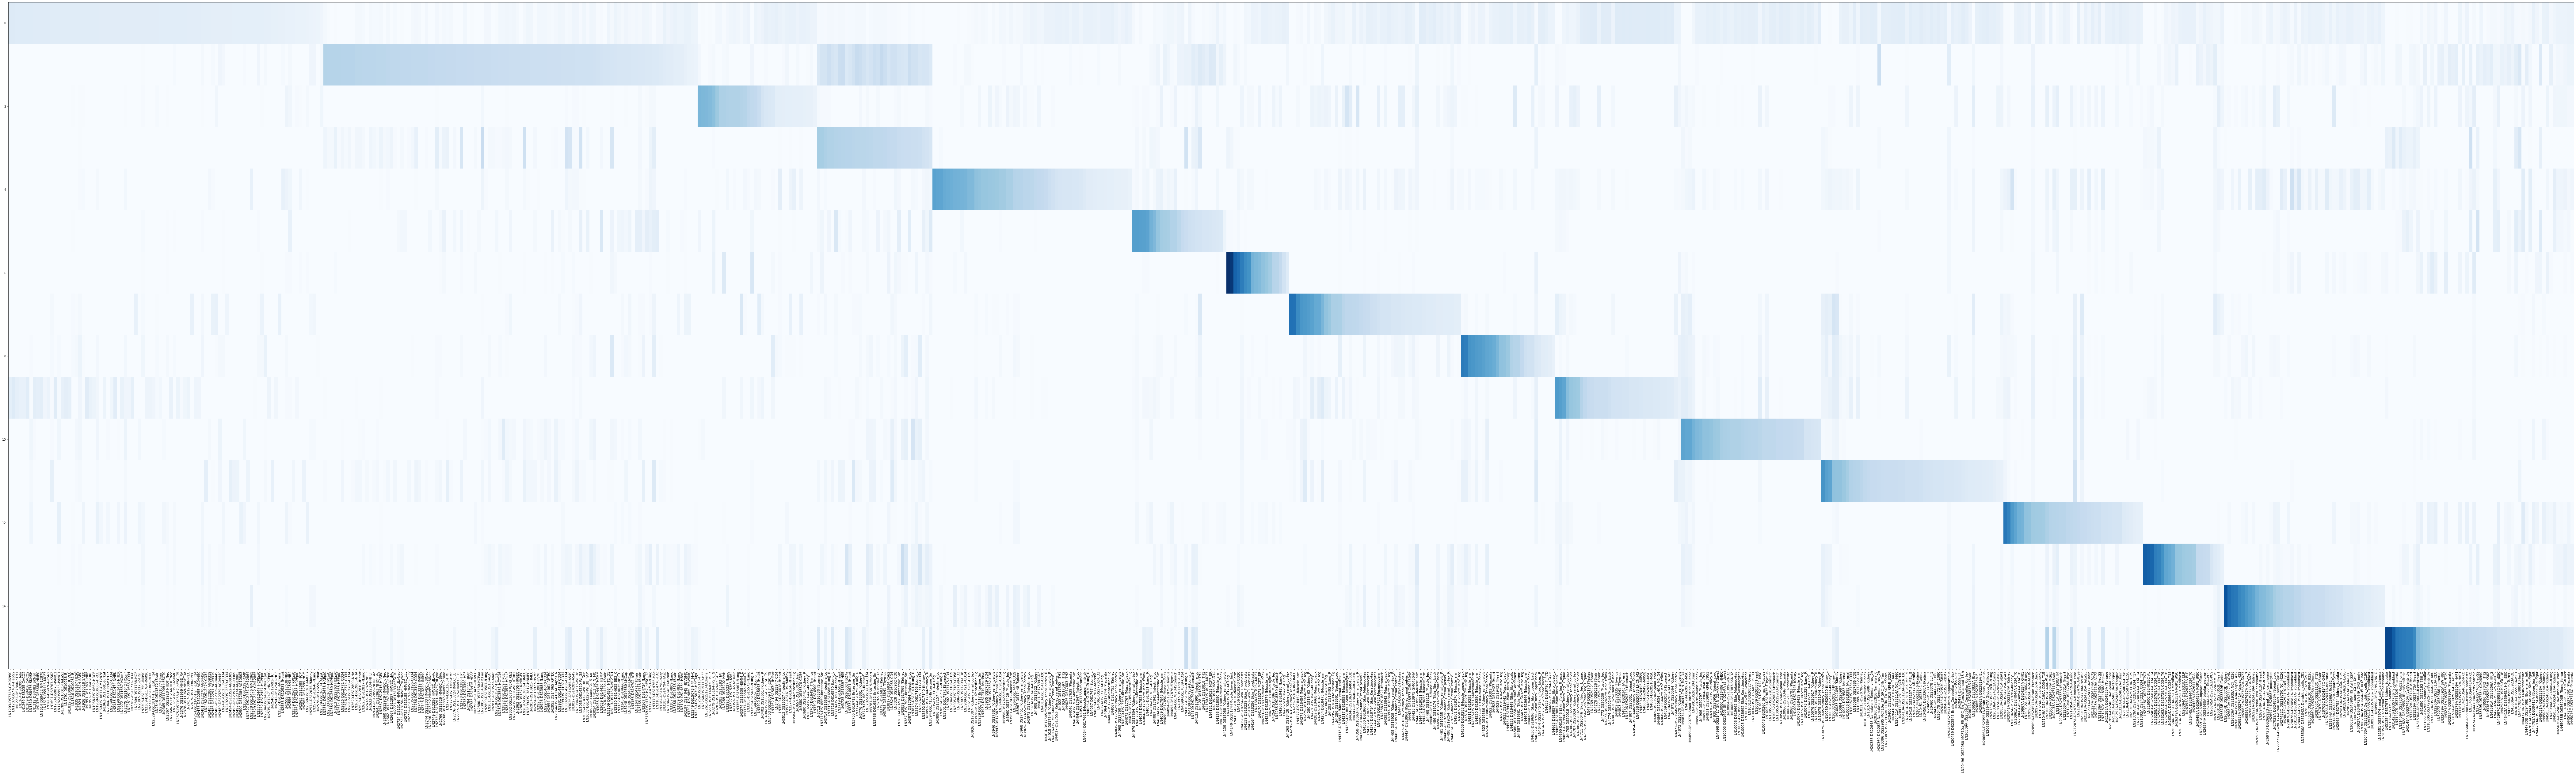

In [8]:
decomp.make_standard_heatmap_plot(733, decomp.Basis, '', names=np.array(fullnames), barsortorder= bar_graph_sort_order)

### To get a better semantic way to describe the components, we prefer the "stacked barplot" visualization method, assigning each NMF component to a color

<Figure size 432x288 with 0 Axes>

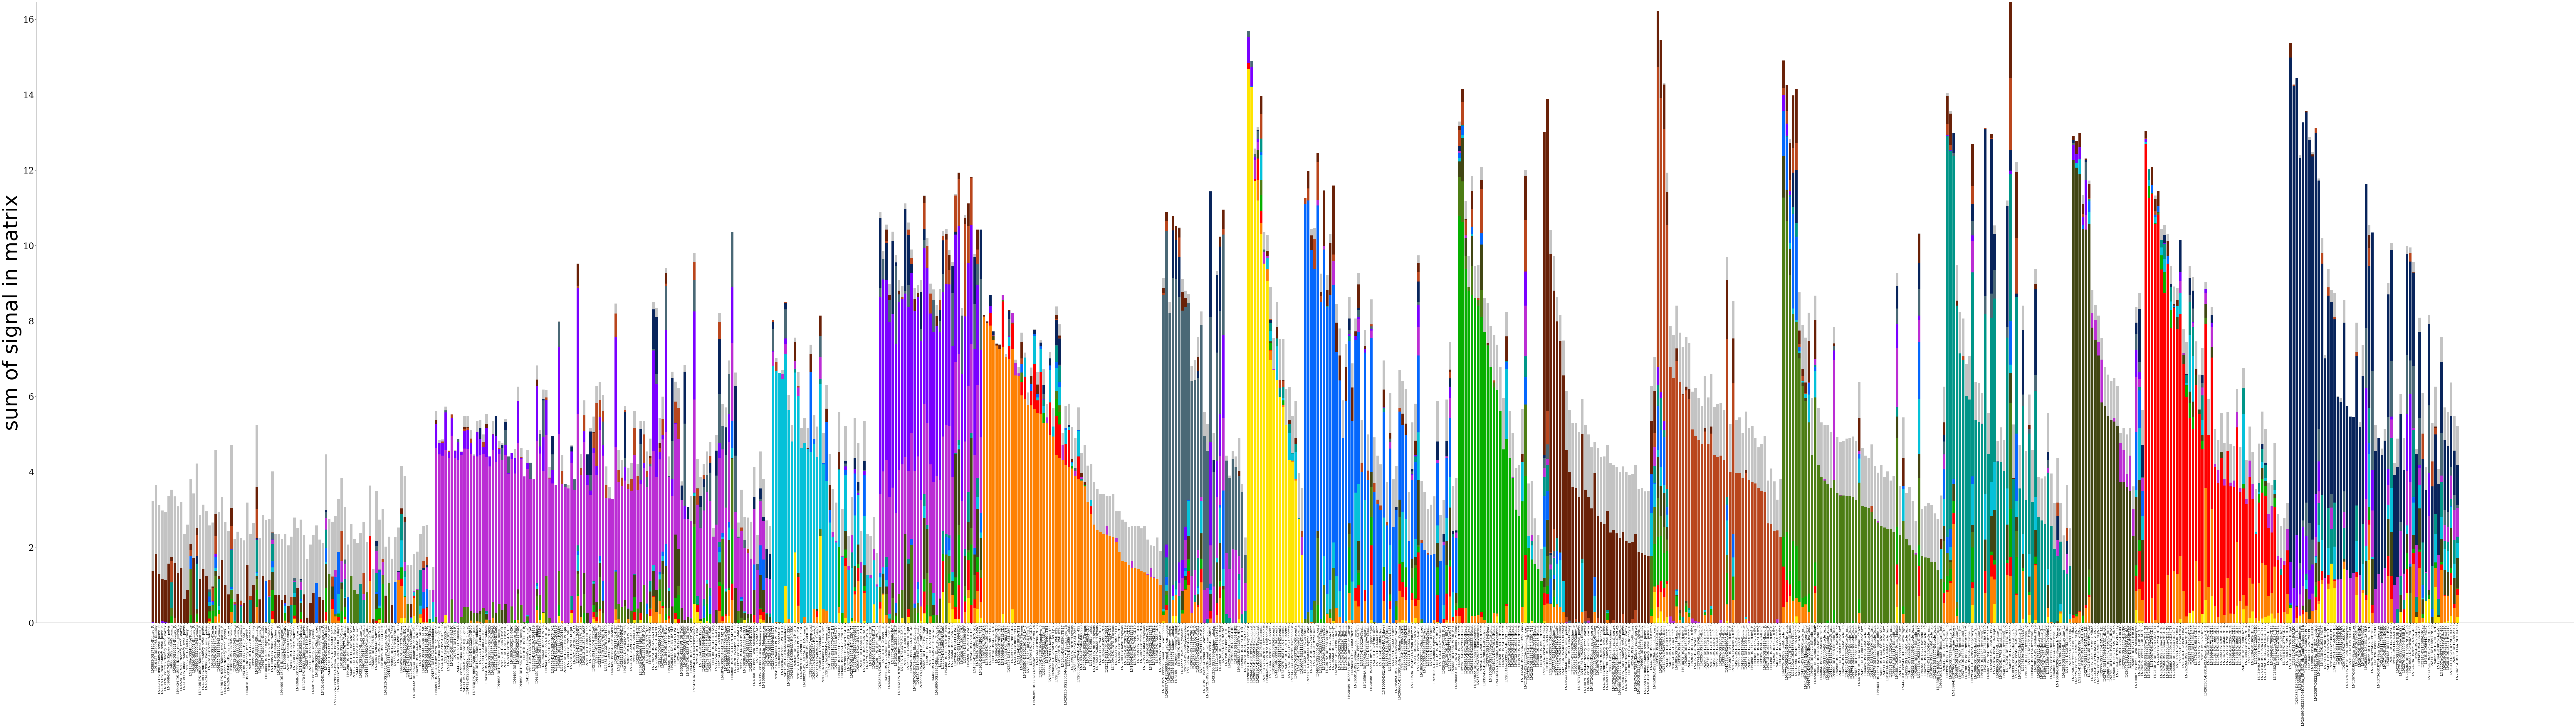

In [10]:
decomp.make_stacked_bar_plot(733, decomp.Basis.T, '', names=np.array(fullnames), official_order=True, barsortorder=bar_graph_sort_order)

### We typically normalize the loadings of each biosample to obtain a uniform view

<Figure size 432x288 with 0 Axes>

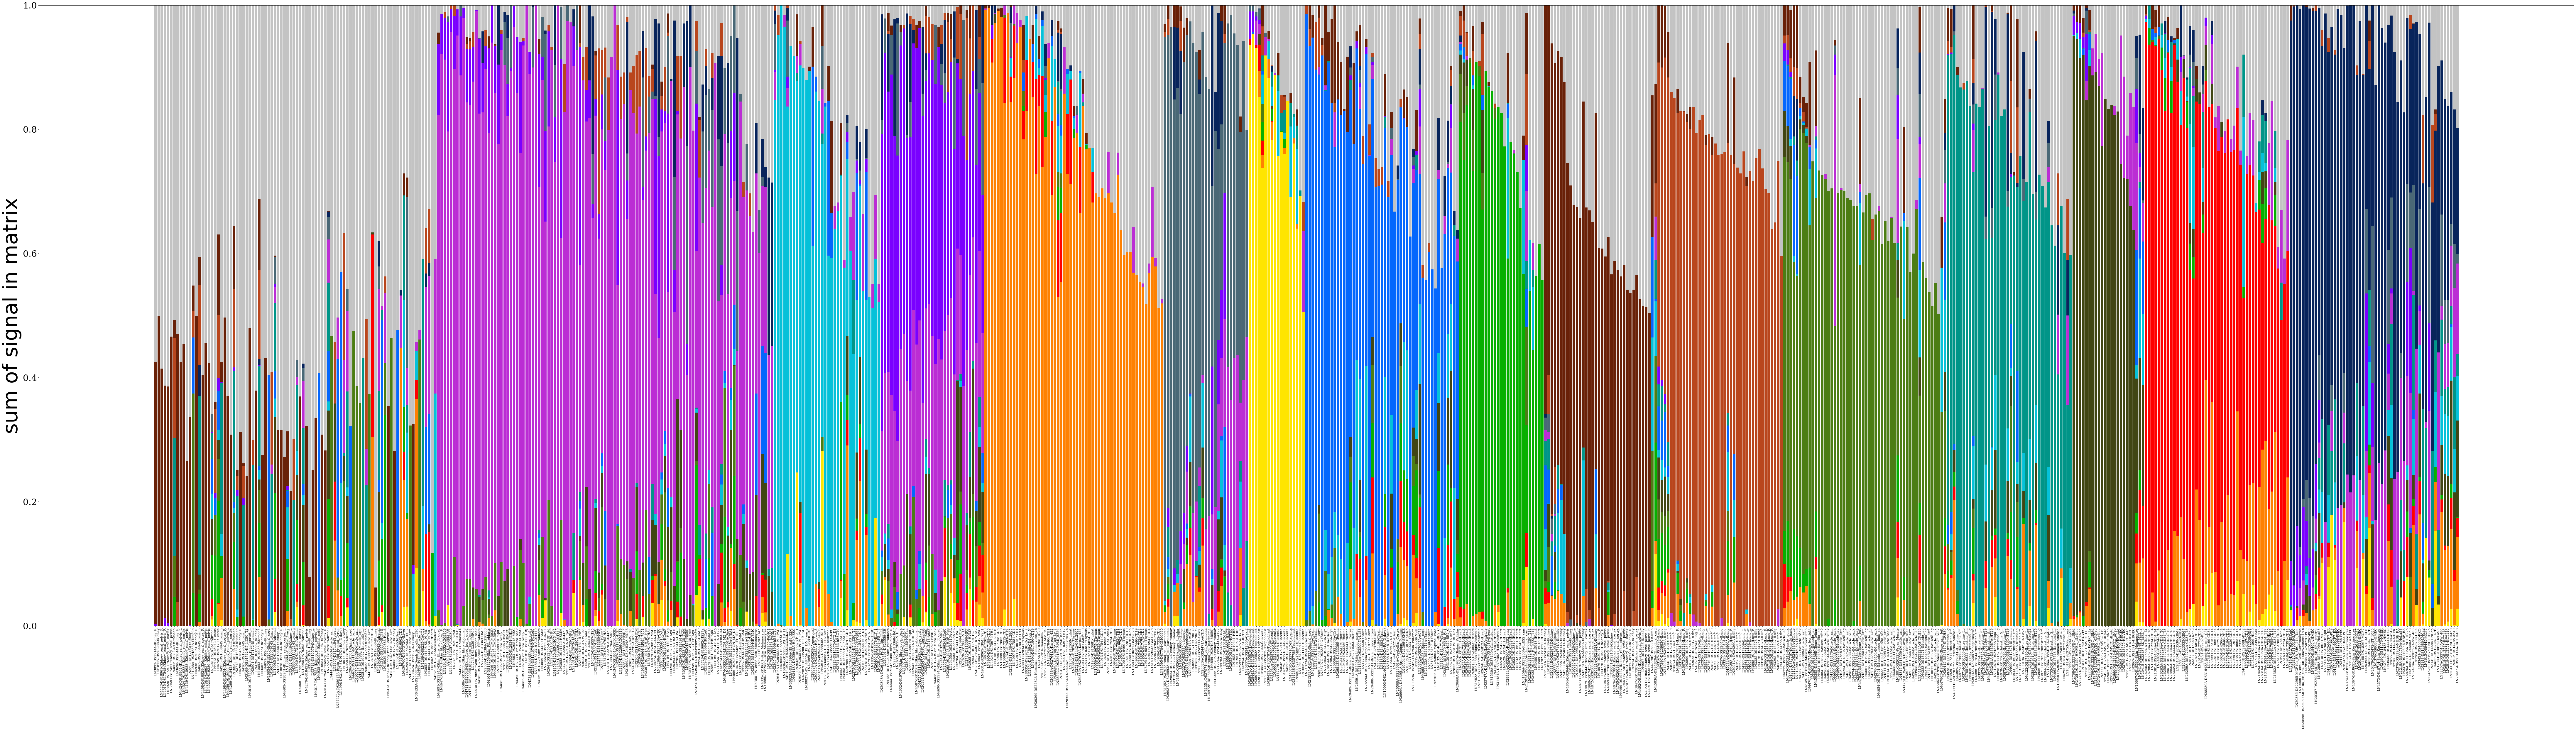

In [11]:
decomp.normalize_matrices()
decomp.make_stacked_bar_plot(733, decomp.NormedBasis.T, '', names=np.array(fullnames), official_order=True, barsortorder=bar_graph_sort_order)

### We can see how samples relate to each other with a simple UMAP embedding. 

In [12]:
import umap
reducer = umap.UMAP(min_dist=0.5, n_neighbors=200, random_state=33)
embedding = reducer.fit_transform(decomp.Basis)
majcomp = np.argmax(decomp.Basis, axis=1)
majcomp_no1 = np.argmax(decomp.Basis[:,1:], axis=1)+1

<Figure size 432x288 with 0 Axes>

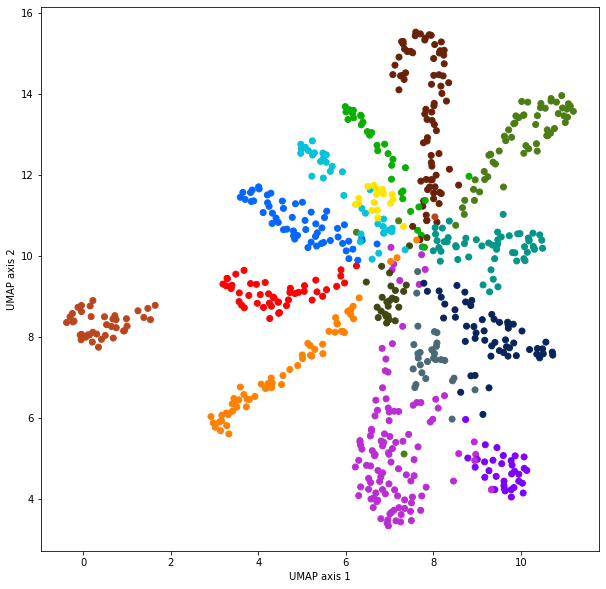

In [13]:
plt.clf()
plt.figure(figsize=(10,10))
plt.scatter(embedding[:,0], embedding[:,1], color=Comp_colors[majcomp_no1])
plt.ylabel('UMAP axis 2')
plt.xlabel('UMAP axis 1')
plt.savefig('all_embedding.pdf')
plt.show()

### This organization suggests that there is very discrete structure in the data that separates groups of samples

### First let's inspect the 'green' biosamples

In [14]:
green_cut = np.argmax(decomp.Basis, axis=1) == 8
len(green_cut[green_cut])

27

<Figure size 432x288 with 0 Axes>

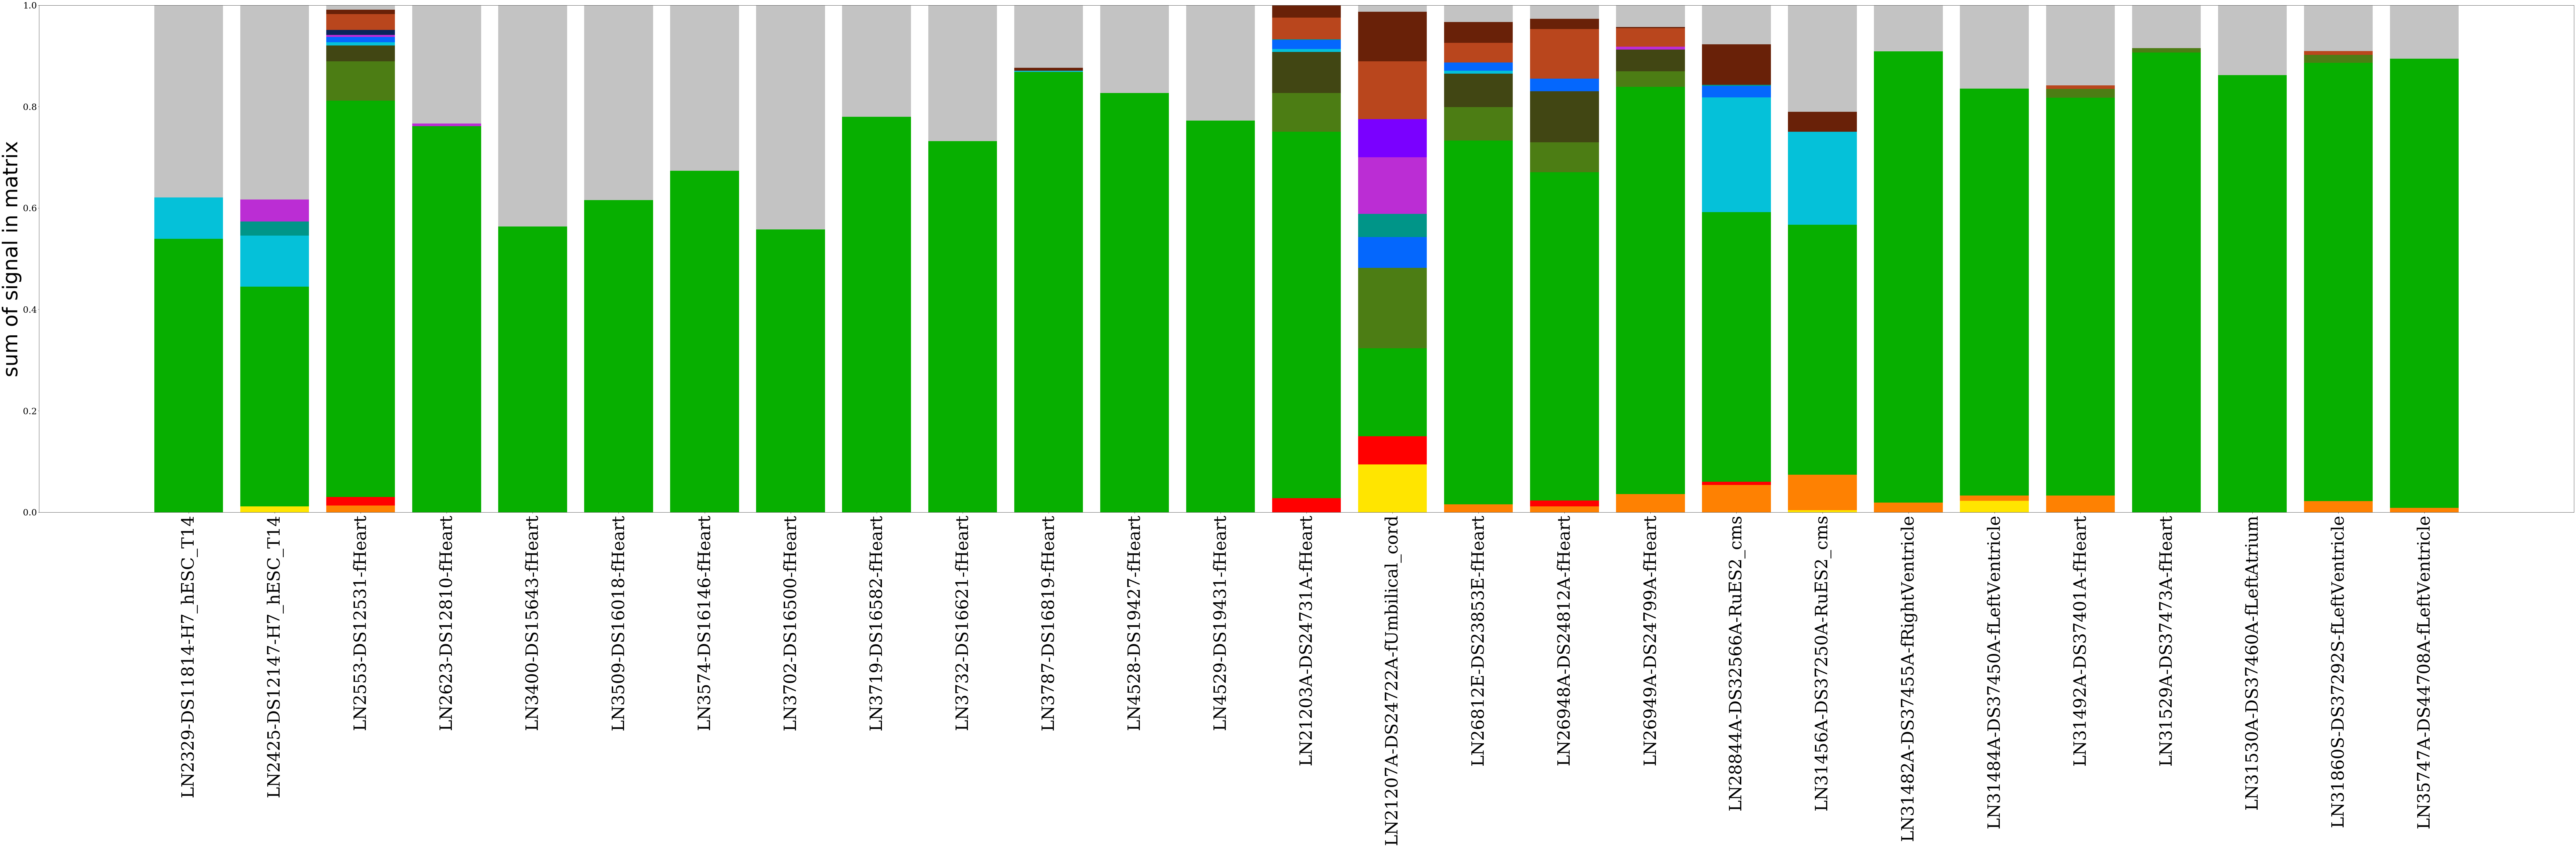

In [15]:
decomp.make_stacked_bar_plot(len(green_cut[green_cut]), decomp.NormedBasis[green_cut].T, '', names=np.array(fullnames)[green_cut], official_order=True)

In [16]:
np.array(fullnames)[green_cut]

array(['LN2329-DS11814-H7_hESC_T14', 'LN2425-DS12147-H7_hESC_T14',
       'LN2553-DS12531-fHeart', 'LN2623-DS12810-fHeart',
       'LN3400-DS15643-fHeart', 'LN3509-DS16018-fHeart',
       'LN3574-DS16146-fHeart', 'LN3702-DS16500-fHeart',
       'LN3719-DS16582-fHeart', 'LN3732-DS16621-fHeart',
       'LN3787-DS16819-fHeart', 'LN4528-DS19427-fHeart',
       'LN4529-DS19431-fHeart', 'LN21203A-DS24731A-fHeart',
       'LN21207A-DS24722A-fUmbilical_cord', 'LN26812E-DS23853E-fHeart',
       'LN26948A-DS24812A-fHeart', 'LN26949A-DS24799A-fHeart',
       'LN28844A-DS32566A-RuES2_cms', 'LN31456A-DS37250A-RuES2_cms',
       'LN31482A-DS37455A-fRightVentricle',
       'LN31484A-DS37450A-fLeftVentricle', 'LN31492A-DS37401A-fHeart',
       'LN31529A-DS37473A-fHeart', 'LN31530A-DS37460A-fLeftAtrium',
       'LN31860S-DS37292S-fLeftVentricle',
       'LN35747A-DS44708A-fLeftVentricle'], dtype=object)

### A strong common theme to these biosampls: all are cardiac/heart-related!

### Now let's inspect the 'blue' biosamples

In [17]:
blue_cut =  np.argmax(decomp.Basis, axis=1) == 7
len(blue_cut[blue_cut])

49

<Figure size 432x288 with 0 Axes>

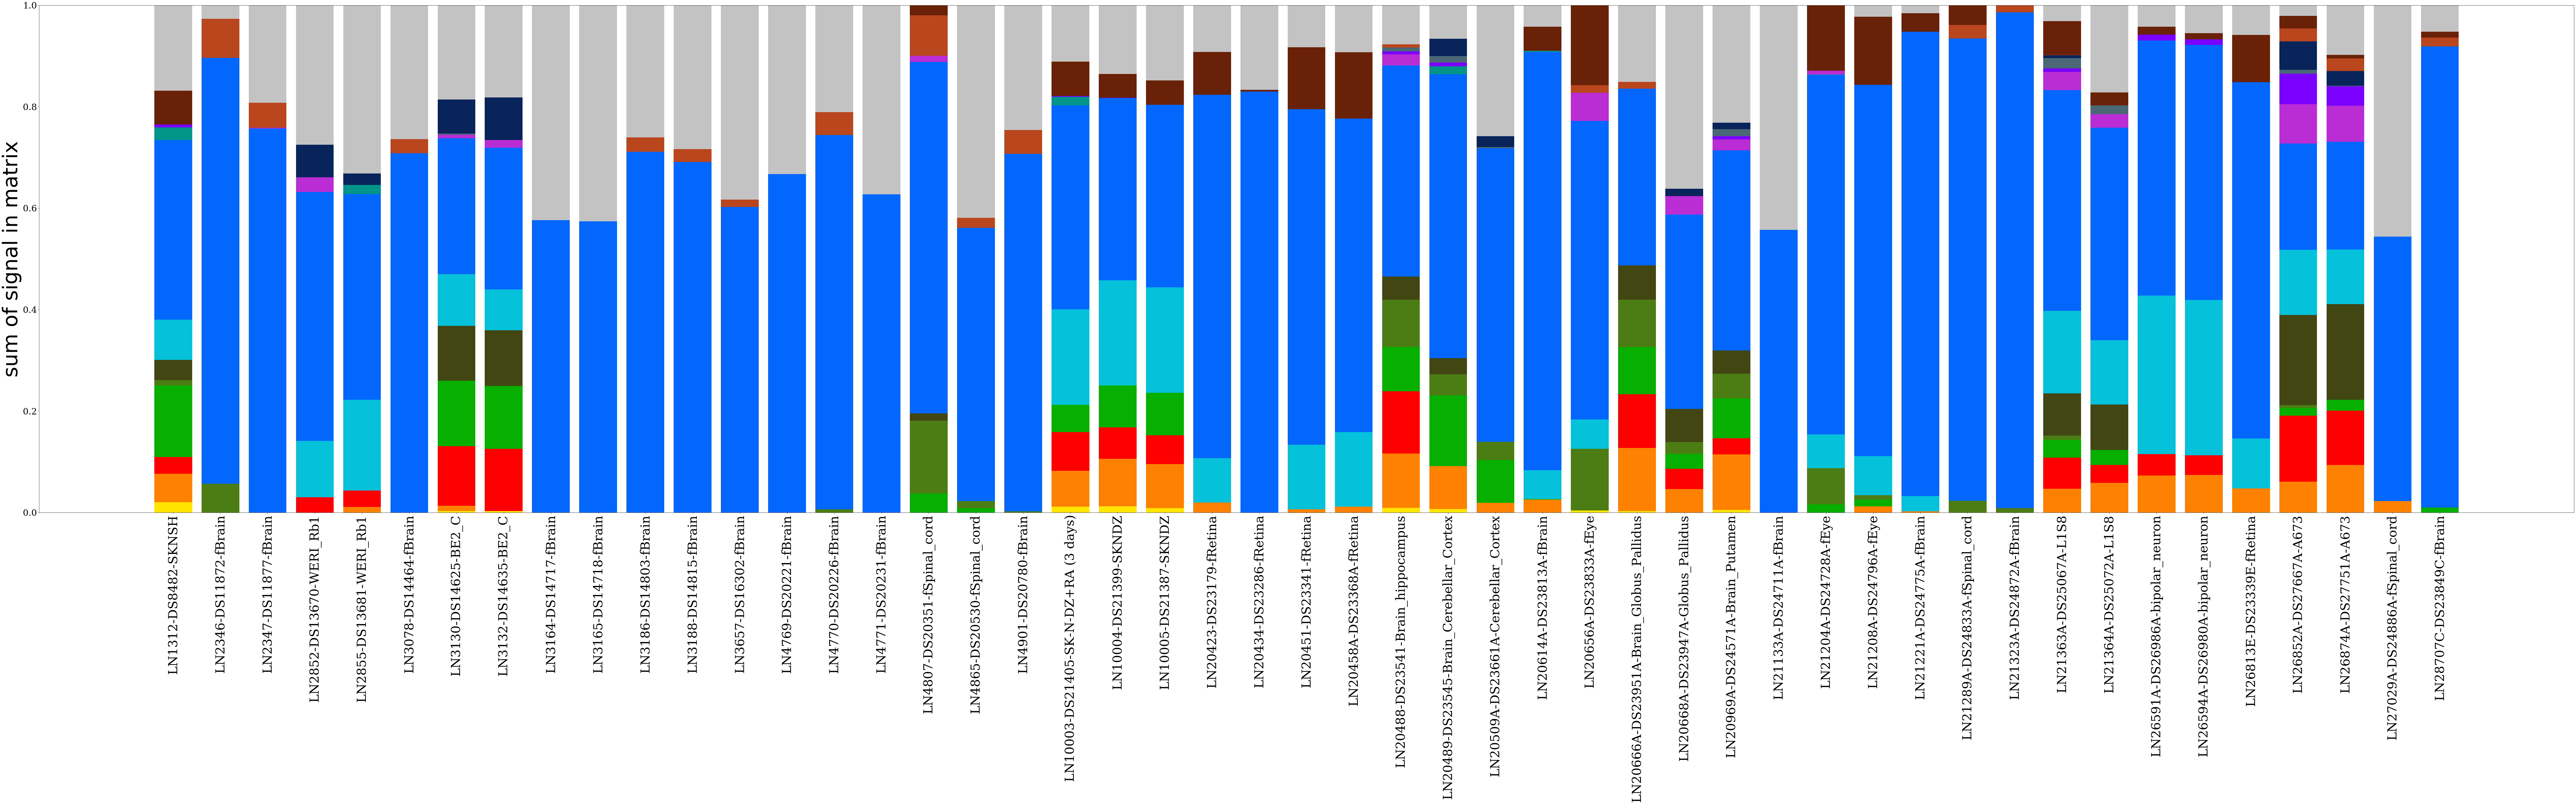

In [18]:
decomp.make_stacked_bar_plot(len(blue_cut[blue_cut]), decomp.NormedBasis[blue_cut].T, '', names=np.array(fullnames)[blue_cut], official_order=True)

In [19]:
np.array(fullnames)[blue_cut]

array(['LN1312-DS8482-SKNSH', 'LN2346-DS11872-fBrain',
       'LN2347-DS11877-fBrain', 'LN2852-DS13670-WERI_Rb1',
       'LN2855-DS13681-WERI_Rb1', 'LN3078-DS14464-fBrain',
       'LN3130-DS14625-BE2_C', 'LN3132-DS14635-BE2_C',
       'LN3164-DS14717-fBrain', 'LN3165-DS14718-fBrain',
       'LN3186-DS14803-fBrain', 'LN3188-DS14815-fBrain',
       'LN3657-DS16302-fBrain', 'LN4769-DS20221-fBrain',
       'LN4770-DS20226-fBrain', 'LN4771-DS20231-fBrain',
       'LN4807-DS20351-fSpinal_cord', 'LN4865-DS20530-fSpinal_cord',
       'LN4901-DS20780-fBrain', 'LN10003-DS21405-SK-N-DZ+RA (3 days)',
       'LN10004-DS21399-SKNDZ', 'LN10005-DS21387-SKNDZ',
       'LN20423-DS23179-fRetina', 'LN20434-DS23286-fRetina',
       'LN20451-DS23341-fRetina', 'LN20458A-DS23368A-fRetina',
       'LN20488-DS23541-Brain_hippocampus',
       'LN20489-DS23545-Brain_Cerebellar_Cortex',
       'LN20509A-DS23661A-Cerebellar_Cortex', 'LN20614A-DS23813A-fBrain',
       'LN20656A-DS23833A-fEye',
       'LN20666A-DS239

### In this case, we see that the common theme is related to the nervous system.

### We have done this for all colors and thus assigned semantic labels to the NMF components (colors). 

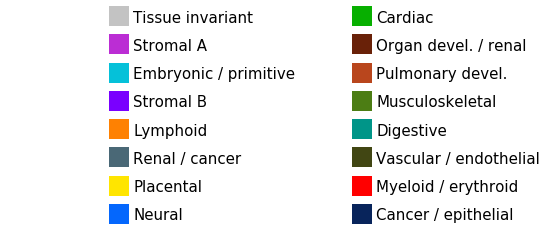

In [20]:
decomp.make_anatomy_key()